<a href="https://colab.research.google.com/github/jsjs6/tensorflow2/blob/main/Callback_function_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Callback function

- 특정상황에 대해 먼저 시스템에 등록
- 특정상황이 발생하면 시스템이 자동으로 실행해주는 함수

###Tensorflow 에서 callback function 3가지에 대해 살펴봅시다.
1. 학습도중에 학습률을 변화시킬수 있다.
2. 학습도중에 일정시간이 지나도 validation data에 대한 loss값의 변화가 없다면 학습을 자동으로 멈추게 할 수 있다.
3. 모델의 가중치를 학습중에 중간중간에 저장할 수 있는 기능


In [1]:
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dense

from keras.datasets import mnist


In [3]:
#1. train, test 데이터 로드
(x_train, t_train), (x_test, t_test) = mnist.load_data()
#print('x_train.shape = ', x_train.shape, 't_train.shape = ', t_train.shape)

In [5]:
#2. 데이터 전처리 : 정규화, 원핫인코딩
# x_train, x_test 값 수치를 0~1 사이로 바꿔주는 과정 

x_train = x_train / 255.0 # 최대값(255)으로 나눠주면 최대값이 1인 수치로 정규화가 된다.
x_test = x_test / 255.0

# one_hot_encording 

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)



In [6]:
#3. 모델 구축 : 모델 생성 -> 모델에 레이어를 추가 

model = Sequential()

# 입력층에서는 28*28=784 , 2차원을 1차원 vector 변환
model.add(Flatten(input_shape=(28,28)))

# 은닉층에서는 node개수를 100개 (하이퍼 파라메터 이므로 굳이 100개 아니어도 됨)
model.add(Dense(100, activation='relu'))

# 출력층에서는 정답의 개수와 동일한 10 node, 활성화 함수는 softmax 
model.add(Dense(10, activation='softmax'))

In [7]:
#4. 컴파일 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Callback Function 
# ModelCheckpoint가 실행되면 'saving model to

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
file_path = './modelcheckpoint_test.h5'
chekpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='auto')  # val_loss값이 개선되었을때 가장 best인 모델 가중치값 저장
stopping = EarlyStopping(monitor='val_loss',  patience=3 , verbose=1)  # 1. 검증손실(val_loss)이 3회이상 개선되지 않을경우 조기종료 시킴
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3 , verbose=1)  # epoch 3회동안 val_loss가 개선되지 않으면 factor 0.5이므로 현재 학습률 0.5배
hist= model.fit(x_train, t_train, epochs = 30, validation_split=0.2, callbacks=[chekpoint])

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1667 - accuracy: 0.9520 - val_loss: 0.1768 - val_accuracy: 0.9507
Epoch 2/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1631 - accuracy: 0.9533 - val_loss: 0.1709 - val_accuracy: 0.9520
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1591 - accuracy: 0.9541 - val_loss: 0.1674 - val_accuracy: 0.9536
Epoch 4/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1554 - accuracy: 0.9556 - val_loss: 0.1655 - val_accuracy: 0.9532
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1519 - accuracy: 0.9564 - val_loss: 0.1630 - val_accuracy: 0.9539
Epoch 6/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1487 - accuracy: 0.9580 - val_loss: 0.1601 - val_accuracy: 0.9547
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1451 - accuracy: 0.9594 - val_loss: 0.1583 - val_accuracy

In [14]:
#6 . test.data 이용하여 정확도 검증
model.evaluate(x_test, t_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1169 - accuracy: 0.9648


[0.11686475574970245, 0.9648000001907349]

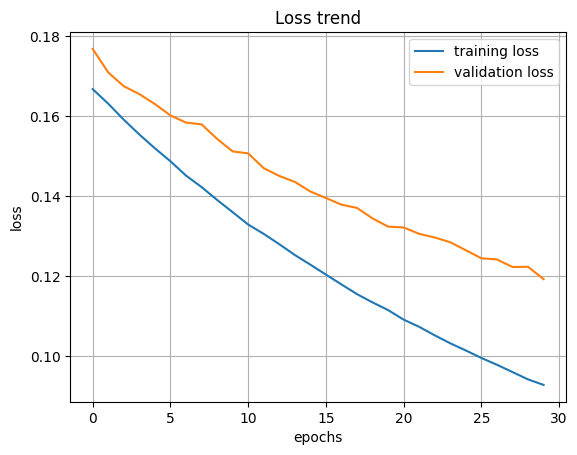

In [16]:
#7. 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

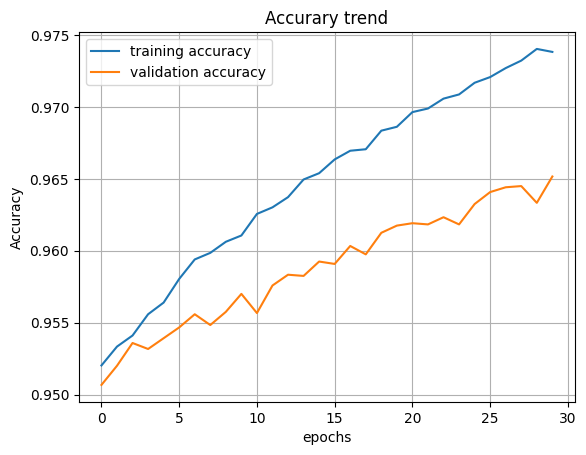

In [17]:
#7. 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Accurary trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

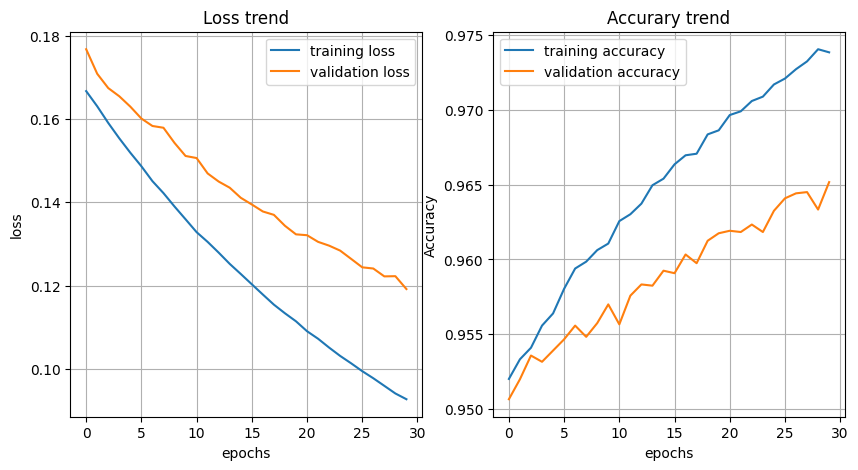

In [18]:
# 7. 손실함수와 정확도함수 그래프 

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1,2,2)
plt.title('Accurary trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()